In [1]:
# Імпорт необхідних бібліотек
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures

In [2]:
# Зчитуємо дані з csv-файлу
data = pd.read_csv('data.csv')
data.set_index('№', inplace = True)

In [3]:
# Показуємо дані
data

,Iron in water,Iron in hair
№,,
1,0.0240,11.7
2,0.0380,12.7
3,0.0400,15.5
4,0.0450,16.8
5,0.0470,16.7
6,0.0578,17.5
7,0.0629,18.5
8,0.0629,18.7
9,0.0630,18.8


Coefficient of determination: 0.820074348632256


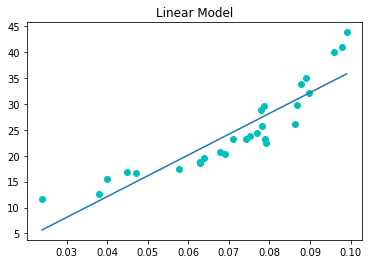

In [4]:
# Реалізація лінійної моделі
x_linear = np.array(data['Iron in water']).reshape((-1, 1))
y_linear = np.array(data['Iron in hair'])

linear_model = LinearRegression()
linear_model.fit(x_linear, y_linear)

y_linear_pred = linear_model.predict(x_linear)
data['Linear Predicted'] = y_linear_pred
plt.plot(data['Iron in water'], data['Iron in hair'], 'co')
plt.plot(data['Iron in water'], data['Linear Predicted'])
plt.title('Linear Model')
plt.show
plt.savefig('Linear_model.png')

c_linear = linear_model.score(x_linear, y_linear)
print('Coefficient of determination:', c_linear)

Coefficient of determination: 0.9381488875142406


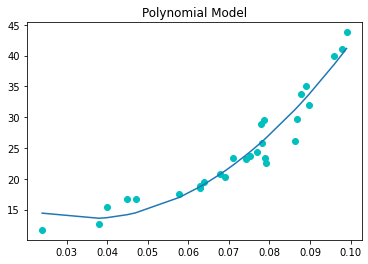

In [5]:
# Реалізація поліноміальної моделі
x_polynomial = np.array(data['Iron in water']).reshape((-1, 1))
y_polynomial = np.array(data['Iron in hair'])

transformer = PolynomialFeatures(degree = 2, include_bias = False)
transformer.fit(x_polynomial)
x_polynomial_ = transformer.transform(x_polynomial)

polynomial_model = LinearRegression().fit(x_polynomial_, y_polynomial)

y_polynomial_pred = polynomial_model.predict(x_polynomial_)
data['Polynomial Predicted'] = y_polynomial_pred
plt.plot(data['Iron in water'], data['Iron in hair'], 'co')
plt.plot(data['Iron in water'], data['Polynomial Predicted'])
plt.title('Polynomial Model')
plt.show
plt.savefig('Polynomial_model.png')

c_polynomial = polynomial_model.score(x_polynomial_, y_polynomial)
print('Coefficient of determination:', c_polynomial)

Coefficient of determination: 0.68221550020459


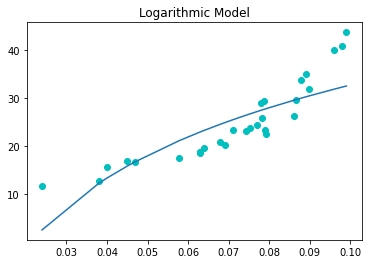

In [6]:
# Реалізація логарифмічної моделі
x_logarithmic = np.array(data['Iron in water']).reshape((-1, 1))
y_logarithmic = np.array(data['Iron in hair'])

xlog_logarithmic = np.log(x_logarithmic)

logarithmic_model = LinearRegression()
logarithmic_model.fit(xlog_logarithmic, y_logarithmic)

y_logarithmic_pred = logarithmic_model.predict(xlog_logarithmic)
data['Logarithmic Predicted'] = y_logarithmic_pred
plt.plot(data['Iron in water'], data['Iron in hair'], 'co')
plt.plot(data['Iron in water'], data['Logarithmic Predicted'])
plt.title('Logarithmic Model')
plt.show
plt.savefig('Logarithmic_model.png')

c_logarithmic = logarithmic_model.score(xlog_logarithmic, y_logarithmic)
print('Coefficient of determination:', c_logarithmic)

Coefficient of determination: 0.9179776111929114


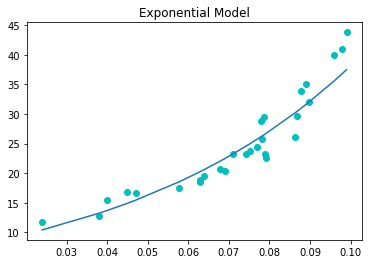

In [7]:
# Реалізація експоненційної моделі
x_exponential = np.array(data['Iron in water']).reshape((-1, 1))
y_exponential = np.array(data['Iron in hair'])

ylog_exponential = np.log(y_exponential)

# y = Aexp(-BX) ==> ln(Y) = ln(A) - BX
exponential_model = LinearRegression()
exponential_model.fit(x_exponential, ylog_exponential)

y_exponential_pred = np.exp(exponential_model.predict(x_exponential))
data['Exponential Predicted'] = y_exponential_pred
plt.plot(data['Iron in water'], data['Iron in hair'], 'co')
plt.plot(data['Iron in water'], data['Exponential Predicted'])
plt.title('Exponential Model')
plt.show
plt.savefig('Exponential_model.png')

c_exponential = exponential_model.score(x_exponential, ylog_exponential)
print('Coefficient of determination:', c_exponential)

In [8]:
# Показуємо дані
data

,Iron in water,Iron in hair,Linear Predicted,Polynomial Predicted,Logarithmic Predicted,Exponential Predicted
№,,,,,,
1,0.0240,11.7,5.686278,14.423108,2.425375,10.433365
2,0.0380,12.7,11.302018,13.593102,12.192155,13.246580
3,0.0400,15.5,12.104267,13.692624,13.282330,13.706138
4,0.0450,16.8,14.109889,14.179968,15.785660,14.926000
5,0.0470,16.7,14.912137,14.470321,16.709881,15.443821
6,0.0578,17.5,19.244280,16.980396,21.106029,18.566754
7,0.0629,18.5,21.290014,18.718372,22.903190,20.253724
8,0.0629,18.7,21.290014,18.718372,22.903190,20.253724
9,0.0630,18.8,21.330126,18.755994,22.936953,20.288290
